In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline


from collections import Counter
import spacy
from tqdm.auto import tqdm
tqdm.pandas(desc='Progress')

In [8]:
data = pd.read_csv("data/large/train.csv",encoding = "ISO-8859-1",names=["target","id","date","flag","user","text"])
data['text'] = data.text.progress_apply(lambda x: x.strip())
data_vals = data.values

In [9]:
def cleanString(s):
    s = s.lower().strip()
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z]+", r" ", s)
    return s

nlp = spacy.load('en',disable=['parser', 'tagger', 'ner'])
sentences = data_vals[:,5]

In [10]:
words = Counter()
for sentence in tqdm(sentences):
    try:
        words.update(word for word in nlp(cleanString(sentence)))
    except:
        print("Break, sentence", sentence)
        print("Fixed sentence",normalizeString(sentence))
        break

In [11]:
words = sorted(words, key=words.get, reverse=True)
words = ['PAD','CTX','SOS','EOS'] + words

In [13]:
word_df = pd.DataFrame(words)

In [14]:
word_df.to_csv("data/words.csv")

In [66]:
word_df = pd.read_csv("data/words.csv",squeeze=True)


In [67]:
drop_ind = np.where(word_df["0"]==" ")[0]
print(drop_ind)
print(len(drop_ind))
word_df = word_df.drop(drop_ind)

[       4       50       78 ... 22880719 22880749 22880752]
726488


In [68]:
index_word = {x:y for x,y in enumerate(word_df["0"])}
word_index = {y:x for x,y in enumerate(word_df["0"])}

In [104]:
print(word_index["switchfoot"])

21563451


In [118]:
def indices_func(sentence):
    indices = [2]
    for word in nlp(cleanString(sentence)):
        try:
            indices.append(word_index[word.text.lower()])
        except:
            pass
            
    indices.append(3)

    return indices

    

data['indices'] = data.text.progress_apply(indices_func)



In [119]:
data['length'] = data.indices.progress_apply(len)

In [123]:
def replace(x):
    if (x==4): 
        return 1 
    else: 
        return x
    
data['target'] = data.target.progress_apply(replace)

Max data length 55
Distribution:


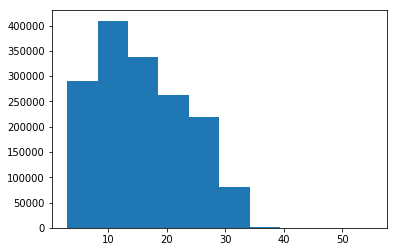

In [132]:
print("Max data length",data.length.values.max())
print("Distribution:")
plt.hist(data.length.values)
plt.show();


In [133]:
dfind = pd.DataFrame.from_dict(index_word,orient="index")

In [134]:
dfind.to_csv("data/word_index.csv")
data.to_csv("data/large/processed.csv")